<a href="https://colab.research.google.com/github/cuboid0223/Deep-Generative-Models/blob/main/grad_cam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
!pip install --upgrade tf-keras-vis tensorflow
!pip install Pillow
!wget "https://encrypted-tbn0.gstatic.com/licensed-image?q=tbn:ANd9GcRoTnd80s9q0wF7nb_dPH_XwK4DR9wAVPmjkMkIp3eEldR4Uz4cfiFD-FWiQGXjPPZ57lQ5KKWrtPTHsZw" -O /content/image.png

# !wget "https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/domestic-gray-tabby-cat-with-an-orange-nose-is-royalty-free-image-1686039395.jpg?crop=0.668xw:1.00xh;0.264xw,0&resize=480:*" -O /content/image2.png



!wget "https://raw.githubusercontent.com/yizt/Grad-CAM.pytorch/master/examples/pic1.jpg" -O /content/image2.png


--2023-09-15 10:22:09--  https://encrypted-tbn0.gstatic.com/licensed-image?q=tbn:ANd9GcRoTnd80s9q0wF7nb_dPH_XwK4DR9wAVPmjkMkIp3eEldR4Uz4cfiFD-FWiQGXjPPZ57lQ5KKWrtPTHsZw
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 74.125.137.138, 74.125.137.139, 74.125.137.113, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|74.125.137.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 231164 (226K) [image/jpeg]
Saving to: ‘/content/image.png’

/content/image.png  100%[===================>] 225.75K  --.-KB/s    in 0.002s  

2023-09-15 10:22:09 (96.0 MB/s) - ‘/content/image.png’ saved [231164/231164]

--2023-09-15 10:22:09--  https://raw.githubusercontent.com/yizt/Grad-CAM.pytorch/master/examples/pic1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
H

In [95]:
from xml.etree.ElementInclude import include
import numpy as np
import cv2
import tensorflow as tf
from PIL import Image
from google.colab.patches import cv2_imshow

In [81]:
from tensorflow.keras.applications.vgg16 import VGG16 as Model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
#load the Vgg16 model
model = Model(weights='imagenet',include_top=True)
print(model.summary())


In [93]:
# 245	French bulldog
# 282	tiger cat
image_titles = ['French-bulldog','tiger-cat']

# img1 = Image.open('/content/image.png')
# img2 = Image.open('/content/image2.png')

img1=load_img("/content/image.png", target_size=(224,224))
img2=load_img("/content/image2.png", target_size=(224,224))

# convert it to Numpy Array:
img1_array = cv2.cvtColor(np.array(img1),cv2.COLOR_RGB2BGR)
img2_array = cv2.cvtColor(np.array(img2),cv2.COLOR_RGB2BGR)


print(type(img1))

<class 'PIL.Image.Image'>


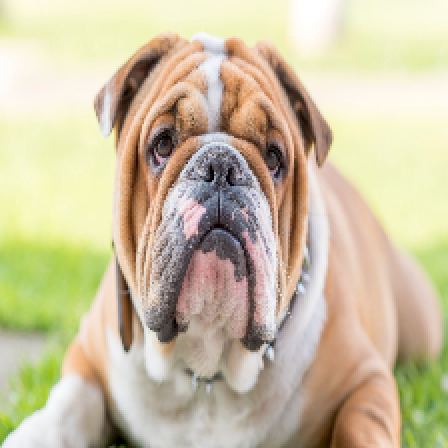

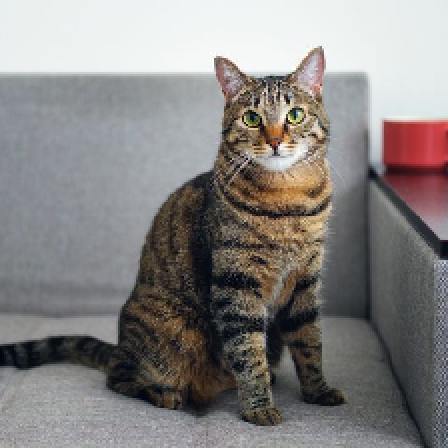

-1

In [119]:
# Show the images

cv2_imshow(img1_array)
cv2_imshow(img2_array)
cv2.waitKey(0)

In [98]:
# prepare the data for the Vgg16 model
images = np.asarray([np.array(img1), np.array(img2)])
X = preprocess_input(images)

In [99]:
# define the loss functions with a traget classes
def loss(output):
    return(output[0][283], output[1][150])

In [100]:
# define the model modifier - change the activation function
def model_modifier(mdl):
    mdl.layers[-1].activation = tf.keras.activations.linear # we change the activation function of last layer to linear


In [101]:
# define the grand cam function
from tf_keras_vis.utils import normalize
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

In [103]:
# create an object

gradcam = Gradcam(model,
                model_modifier=model_modifier,
                clone=False)
cam = gradcam(loss, X , penultimate_layer=-1 )# the layer befor the softmax

cam = normalize(cam)

In [104]:
# lets show the outcome :

# to extract the image from the model

heatmapImg1 = np.uint8(cm.jet(cam[0])[..., :3] * 255 )
# chnage the color map to jet
heatmapImg1 = cv2.applyColorMap(heatmapImg1 , cv2.COLORMAP_JET)

In [105]:
# lets add some alpha transparency
alpha = 0.5
overlay = heatmapImg1.copy() # copy the image
result1 = cv2.addWeighted(img1_array, alpha, heatmapImg1 , 1-alpha, 0)


In [106]:
scale_precent = 200
w = int(heatmapImg1.shape[1] * scale_precent / 100)
h = int(heatmapImg1.shape[0] * scale_precent / 100)
dim = (w,h)


In [107]:
result1 = cv2.resize(result1, dim , interpolation=cv2.INTER_AREA)
img1_array = cv2.resize(img1_array, dim , interpolation=cv2.INTER_AREA)


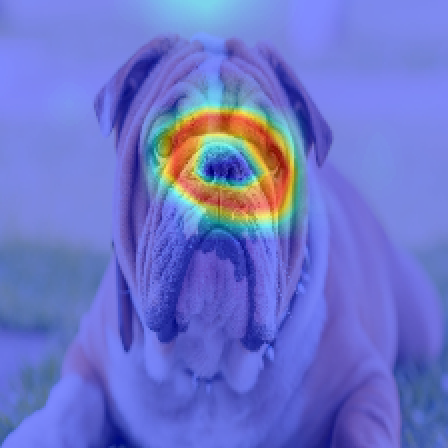

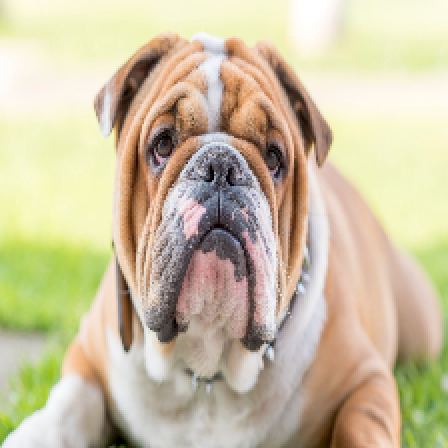

-1

In [122]:
cv2_imshow(result1 )
#cv2.imwrite("GradCam - Cat.jpg",result1 )
cv2_imshow(img1_array )
cv2.waitKey(0)

In [112]:

heatmapImg2 = np.uint8(cm.jet(cam[1])[..., :3] * 255 )
heatmapImg2 = cv2.applyColorMap(heatmapImg2 , cv2.COLORMAP_JET)
overlay = heatmapImg2.copy() # copy the image
result2 = cv2.addWeighted(img2_array, alpha, heatmapImg2 , 1-alpha, 0)


In [113]:
w = int(heatmapImg2.shape[1] * scale_precent / 100)
h = int(heatmapImg2.shape[0] * scale_precent / 100)
dim = (w,h)

In [114]:
result2 = cv2.resize(result2, dim , interpolation=cv2.INTER_AREA)
img2_array = cv2.resize(img2_array, dim , interpolation=cv2.INTER_AREA)


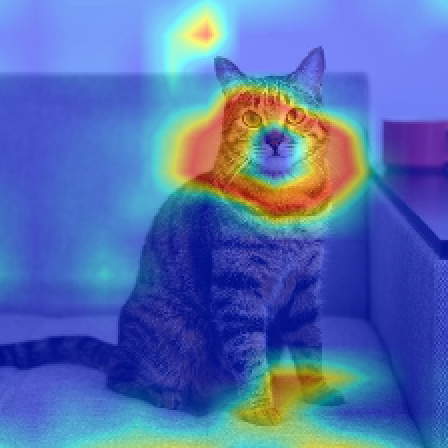

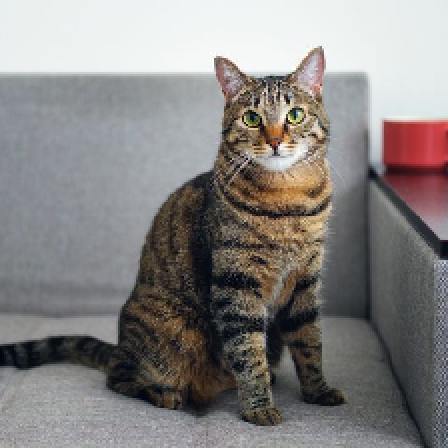

-1

In [121]:
cv2_imshow(result2 )
cv2_imshow(img2_array )
#cv2.imwrite("GradCam - Sea-lion.jpg",result2 )
cv2.waitKey(0)